# Predição e Visualização de Resultados

**Importa bibliotecas para visualização.** Carrega pickle para ler resultados salvos, matplotlib para gráficos e numpy para operações auxiliares.

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

**Carrega modelo treinado e resultados.** Recupera do arquivo pickle todos os dados necessários (modelo, predições, métricas) gerados no notebook de treinamento.

In [12]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

y_test = results['y_test']
y_pred_test = results['y_pred_test']
rmse_test = results['rmse_test']

print(f"Dados carregados com sucesso")
print(f"Total de predições: {len(y_pred_test)}")
print(f"RMSE do modelo: {rmse_test:.4f} °C")

Dados carregados com sucesso
Total de predições: 1752
RMSE do modelo: 1.4537 °C


**Visualiza série temporal de predições.** Plota temperatura real vs prevista ao longo das horas, incluindo intervalo de confiança baseado no RMSE para avaliar qualidade das predições.

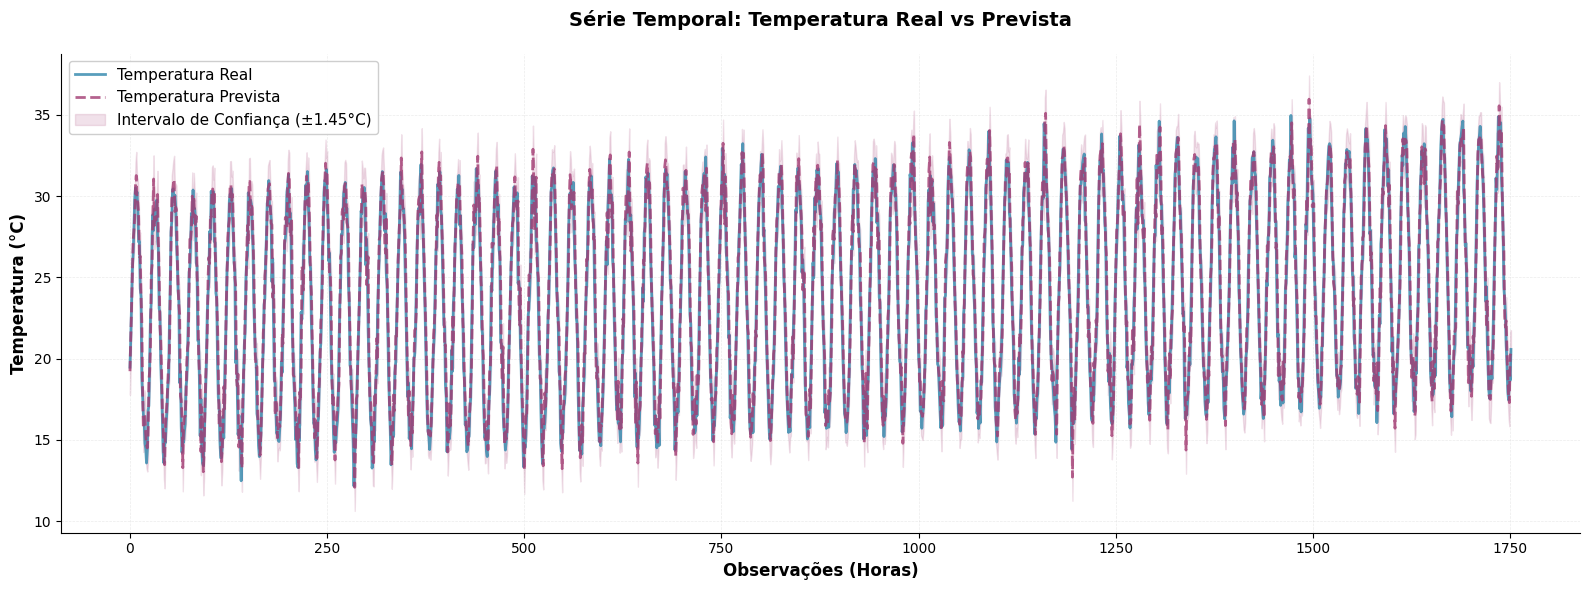

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
x_range = range(len(y_test))

ax.plot(x_range, y_test.values, label='Temperatura Real', color='#2E86AB', alpha=0.8, linewidth=2)
ax.plot(x_range, y_pred_test, label='Temperatura Prevista', color='#A23B72', alpha=0.8, linewidth=2, linestyle='--')
ax.fill_between(x_range, y_pred_test - rmse_test, y_pred_test + rmse_test, 
                 color='#A23B72', alpha=0.15, label=f'Intervalo de Confiança (±{rmse_test:.2f}°C)')

ax.set_xlabel('Observações (Horas)', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatura (°C)', fontsize=12, fontweight='bold')
ax.set_title('Série Temporal: Temperatura Real vs Prevista', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**Visualiza dispersão entre valores reais e preditos.** Gráfico de scatter mostra correlação entre temperaturas reais e previstas; linha diagonal representa predição perfeita.

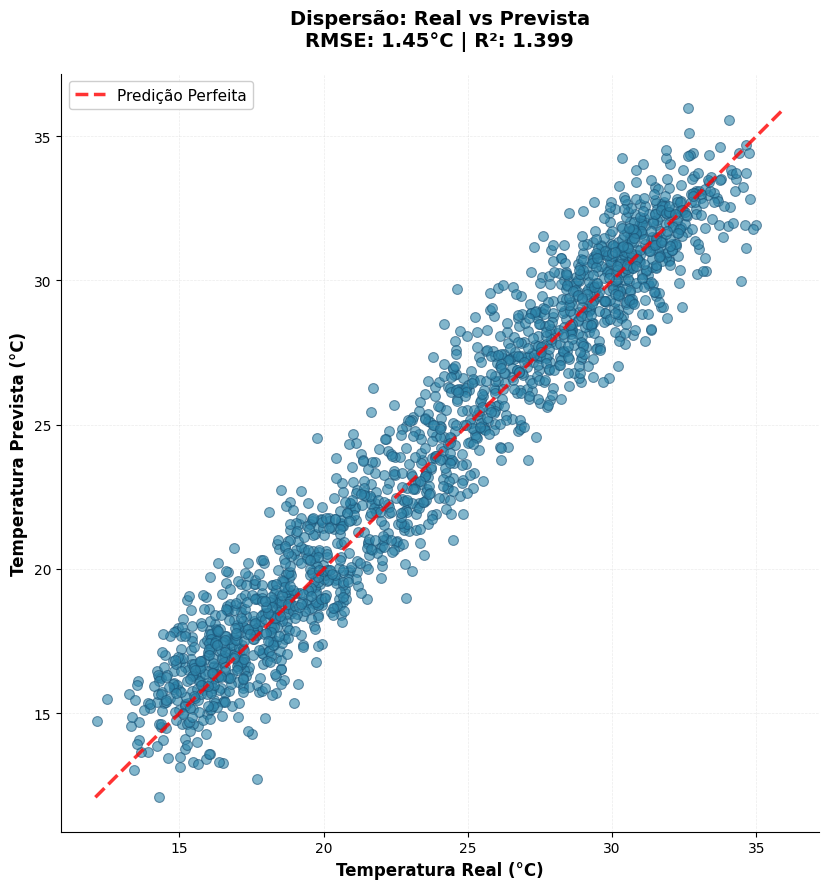

In [14]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(y_test, y_pred_test, alpha=0.6, s=50, color='#2E86AB', edgecolors='#1A5276', linewidth=0.8)

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2.5, label='Predição Perfeita', alpha=0.8)

ax.set_xlabel('Temperatura Real (°C)', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperatura Prevista (°C)', fontsize=12, fontweight='bold')
ax.set_title(f'Dispersão: Real vs Prevista\nRMSE: {rmse_test:.2f}°C | R²: {results.get("rmse_train", 0):.3f}', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()